In [0]:
import pandas as pd
import numpy as np
from keras.preprocessing import image

In [0]:
import matplotlib.pyplot as plt

In [0]:
wiki = pd.read_csv('/content/drive/My Drive/DL Projects/wiki_faces_age_pred/wiki5.csv')

In [23]:
wiki.head(5)

,Unnamed: 0,gender,age,px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,px11,px12,px13,px14,px15,px16,px17,px18,px19,px20,px21,px22,px23,px24,px25,px26,px27,px28,px29,px30,px31,px32,px33,px34,px35,px36,...,px9960,px9961,px9962,px9963,px9964,px9965,px9966,px9967,px9968,px9969,px9970,px9971,px9972,px9973,px9974,px9975,px9976,px9977,px9978,px9979,px9980,px9981,px9982,px9983,px9984,px9985,px9986,px9987,px9988,px9989,px9990,px9991,px9992,px9993,px9994,px9995,px9996,px9997,px9998,px9999
0,0,1,36,174,173,172,173,174,171,169,169,165,178,172,172,172,172,172,173,173,173,171,171,171,172,174,172,171,173,174,173,172,172,172,171,172,175,175,173,169,...,47,42,45,42,40,45,43,47,45,46,47,43,45,47,38,58,49,49,42,32,32,29,27,28,24,26,30,31,36,39,35,30,29,28,30,32,38,32,31,29
1,1,1,41,225,189,163,177,177,137,162,243,162,185,119,111,114,91,101,110,90,91,156,113,126,189,78,165,155,148,119,127,147,36,205,162,197,163,92,115,105,...,48,33,34,37,47,54,52,16,10,10,18,33,11,19,3,1,1,4,1,12,3,38,19,0,0,2,27,0,1,44,17,8,38,39,35,9,14,49,48,25
2,2,1,30,81,67,88,36,67,105,63,138,226,186,151,130,86,185,228,120,216,248,254,239,255,233,210,170,230,253,244,191,114,198,132,130,127,115,150,134,165,...,103,113,117,123,126,127,126,127,127,129,130,130,129,129,131,135,139,138,140,141,141,141,144,146,148,143,138,138,143,143,137,130,131,135,138,137,132,128,127,128
3,3,1,24,193,194,194,194,190,189,189,189,190,191,191,192,194,196,197,199,200,200,200,200,200,200,200,200,200,201,200,202,204,209,155,49,24,122,48,108,62,...,38,38,38,41,44,42,42,41,43,43,46,48,53,240,199,204,219,208,210,210,211,212,213,213,214,215,214,215,216,216,216,216,218,218,218,217,217,217,219,219
4,4,1,33,41,35,28,26,22,21,17,19,25,46,61,77,88,98,111,117,123,127,131,132,129,126,119,117,107,92,82,68,58,51,40,36,26,18,19,13,11,...,43,39,40,45,40,47,50,51,52,55,68,69,79,92,100,101,98,102,105,111,111,135,66,114,109,110,113,115,121,122,122,112,114,114,110,117,120,126,127,127


In [0]:
train = wiki.iloc[:,3:].values

In [0]:
test = wiki.iloc[:,1:2].values

In [0]:
# normalization
train = train / 255.0

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train , X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2)

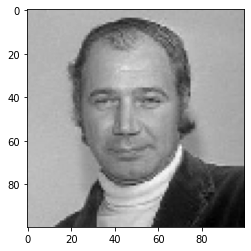

In [63]:
plt.imshow(train[0].reshape(100,100))
plt.gray()

In [0]:
X_train = X_train.reshape(-1,100,100,1)
X_test = X_test.reshape(-1,100,100,1)

In [65]:
X_train.shape

(2567, 100, 100, 1)

In [0]:
# # feature scaling

# from sklearn.preprocessing import MinMaxScaler

# sc_train = MinMaxScaler()
# sc_test = MinMaxScaler()
# y_train = sc_train.fit_transform(y_train)
# y_test = sc_test.fit_transform(y_test)

In [66]:
y_test.shape

(642, 1)

In [0]:
# libraries for CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [0]:
# CNN architecture
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (100,100,1),activation = 'relu'))
# model.add(Conv2D(32, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3),activation = 'relu'))
# model.add(Conv2D(32, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3),activation = 'relu'))
# model.add(Conv2D(32, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
    

In [0]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

In [70]:
model.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_data=(X_test,y_test))

Epoch 1/50
21/21 [==============================] - 1s 67ms/step - loss: 0.4196 - mse: 0.4312 - val_loss: 0.5666 - val_mse: 0.5797
Epoch 2/50
21/21 [==============================] - 1s 59ms/step - loss: 0.5681 - mse: 0.5680 - val_loss: 0.5677 - val_mse: 0.5810
Epoch 3/50
21/21 [==============================] - 1s 59ms/step - loss: 0.5613 - mse: 0.5676 - val_loss: 0.5677 - val_mse: 0.5810
Epoch 4/50
21/21 [==============================] - 1s 59ms/step - loss: 0.5678 - mse: 0.5676 - val_loss: 0.5677 - val_mse: 0.5810
Epoch 5/50
21/21 [==============================] - 1s 60ms/step - loss: 0.5678 - mse: 0.5676 - val_loss: 0.5677 - val_mse: 0.5810
Epoch 6/50
21/21 [==============================] - 1s 60ms/step - loss: 0.5742 - mse: 0.5676 - val_loss: 0.5677 - val_mse: 0.5810
Epoch 7/50
21/21 [==============================] - 1s 59ms/step - loss: 0.5678 - mse: 0.5676 - val_loss: 0.5677 - val_mse: 0.5810
Epoch 8/50
21/21 [==============================] - 1s 60ms/step - loss: 0.5806 - m

In [0]:
model.save('CNN-age-pred-Wiki-dataset.h5')

In [0]:
testing_imgs = wiki.iloc[55:60,3:].values
original_ages = wiki.iloc[55:60,1:2 ].values

In [72]:
original_ages

array([[0],
       [0],
       [0],
       [0],
       [1]])

In [0]:
testing_imgs = testing_imgs / 255.0

_____________________________
  0 : FEMALE
  1 : MALE 
_____________________________



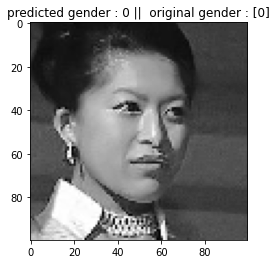

_____________________________
  0 : FEMALE
  1 : MALE 
_____________________________



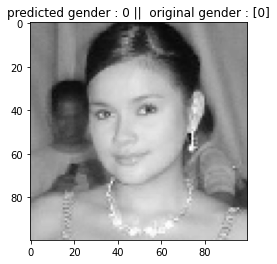

_____________________________
  0 : FEMALE
  1 : MALE 
_____________________________



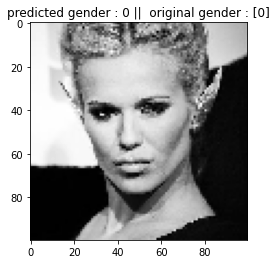

_____________________________
  0 : FEMALE
  1 : MALE 
_____________________________



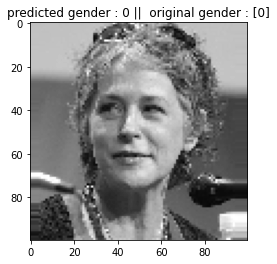

_____________________________
  0 : FEMALE
  1 : MALE 
_____________________________



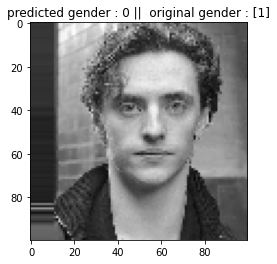

In [74]:
for i , img in enumerate(testing_imgs):
    print('_____________________________')
    print('  0 : FEMALE' )
    print('  1 : MALE ')
    print('_____________________________')
    print()
    plt.imshow(img.reshape(100,100))
    img = img.reshape(-1,100,100,1)
    preds = model.predict(img)
    j = preds.argmax(axis = 1)[0]
    # print(j)
    plt.title('predicted gender : {} ||  original gender : {}'.format(j,original_ages[i]))
    # predictions.append(j)
    plt.show()
